# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Monday, 08.06.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you five projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2019 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to your tutor.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2017-2019. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

# Solution

# Task 1


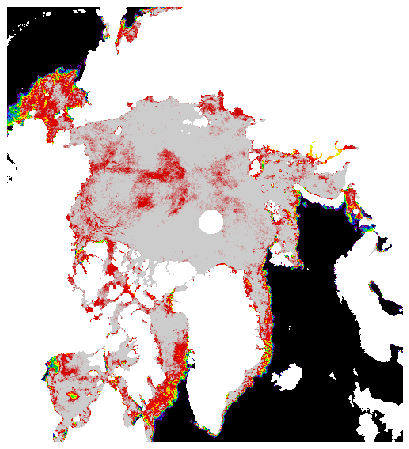

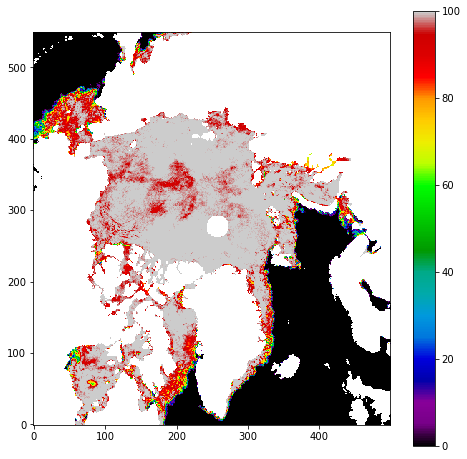

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

# Plotting the array "data".
plt.figure(figsize=(8,8))
plt.imshow(data,origin='lower',cmap=plt.cm.nipy_spectral)

# removing the tick labels
plt.axis('off')
plt.show()


'''
    Here I am ading side bar to the plot which I got from above.
'''

# setting the figure size
plt.figure(figsize=(8,8)) 
our_data = plt.imshow(data, origin ='lower', cmap=plt.cm.nipy_spectral) # cmap states the choice of 

# adding the colourbar on the sides
plt.colorbar(our_data) 
plt.show()

# Task2 (Part 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater


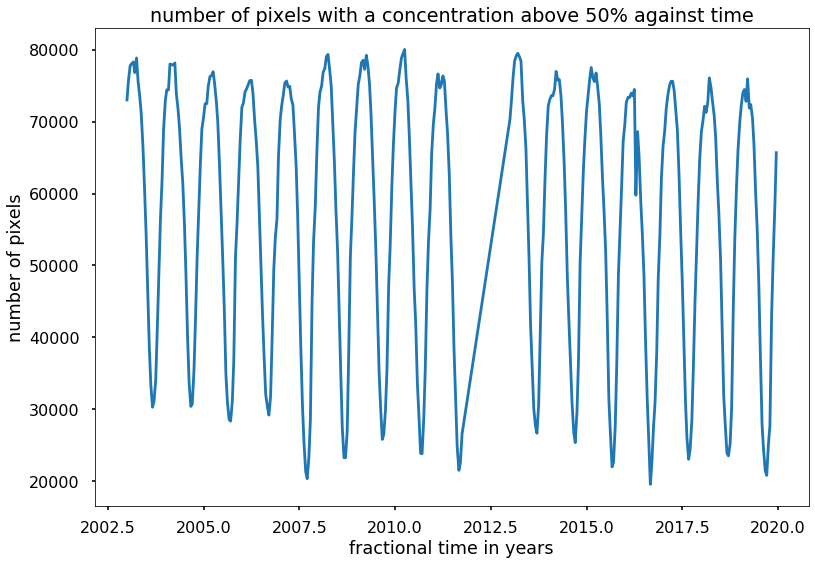

In [2]:
'''
    Here I am plotting the total numbers of pixels above 50% concentration fr each file provided at the given 
    address (/home/shared/Project_2/ice_data/*) against time.
'''


import glob

# loafing files.
files = glob.glob("/home/shared/Project_2/ice_data/*")

# Creating a random array to fill with time values corresponding to each file.
times = np.random.random(size=len(files))

# Creating a random array to fill with total number of pixels above threshold value correspoding to each file.
pixels_above_threshold = np.random.random(size=len(files))


# looping over all files provided in the given destination(address)
for i,f in enumerate(files):
    Year=int(f[-12:-8]) #Year
    Month=int(f[-8:-6])  #Month
    Day=int(f[-6:-4])  #Day
    
    #fractional time in years 
    times[i] = Year+(((Month-1)*30)+(Day-1))/360   
    
    # Loading data correspinding to each address (string) "f". 
    file_data = np.load(f)
    
    # Calcuating the number of pixels with a concentration above 50% for each file and storing them
    # into an array.
    pixels_above_threshold[i] = np.sum(file_data>50) 
    
    
    # Unmark and run the following to varify/print the number of pixels and time for each file.
#     print(f'{i} time = {times[i]}  |  number of pixels with a concentration above 50% = {pixels_above_threshold[i]}') 



# Plotting number of pixels above threshold of 50% agains time.
plt.style.use("seaborn-poster")
plt.xlabel('fractional time in years')
plt.ylabel('number of pixels')
plt.title('number of pixels with a concentration above 50% against time')
plt.plot(times,pixels_above_threshold)
plt.show()




# Task 2 (Part 2)

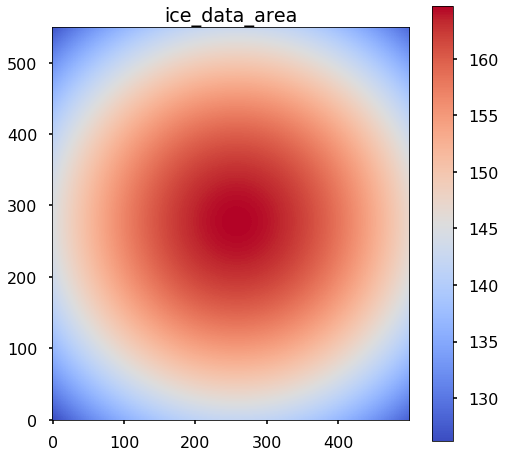

In [3]:
'''
     Loading the file from the given address (/home/shared/Project_2/ice_data_area.npy) and reading in the areas
     and making a plot (with colorbar) to see how the pixel area is changing over the image.
'''

# Loadng the data.
ice_data_area = np.load('/home/shared/Project_2/ice_data_area.npy')

# setting the figure size
plt.figure(figsize=(8,8))
Area = plt.imshow(ice_data_area, origin ='lower', cmap=plt.cm.coolwarm)
plt.title('ice_data_area')

# Adding colourbar on the side
plt.colorbar(Area)
plt.show()

# Task 2 (Part 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


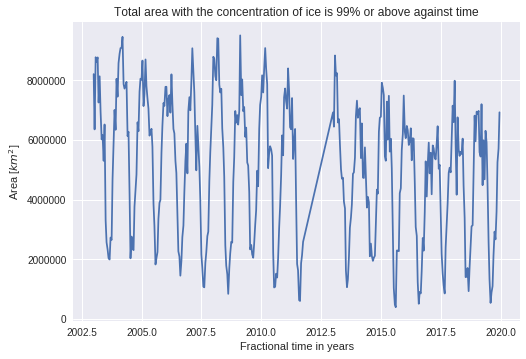

In [4]:
''' Here I am computing the total area for each file where the concentration of ice is more than equal 99%. '''


# Creating a random array to fill with total ice concentration >= 99% corresponding to each file.
ice_concentration = np.random.random(size=len(files)) 


for j,file in enumerate(files):
    
    # loading data of each file turn by turn.
    loading = np.load(file)
    
    # masking the pixels with concentration >= 99%.
    mask = loading >= 99
    
    #Calculating total number of pixels above the threshold vale for each file and storing it into an array.
    ice_concentration[j] = np.sum(ice_data_area[mask])

    
# Plotting the graph between "ice_concentration" and Time.
plt.style.use("seaborn")
plt.xlabel('Fractional time in years')
plt.ylabel('Area [$km^2$]')
plt.title('Total area with the concentration of ice is 99% or above against time')
plt.plot(times,ice_concentration)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]


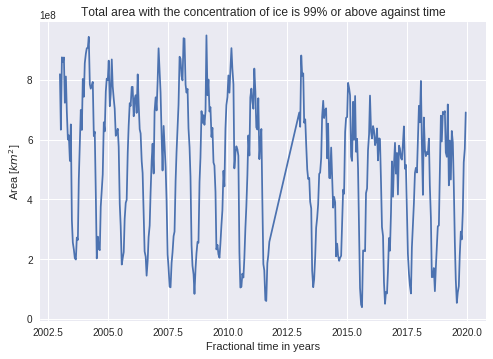

In [5]:
'''Computing the total area covered by ice with ice concentration >= 99% against time. '''

# Creating a random array to store the data.
ice_concentration = np.random.random(size=len(files)) 


for j,file in enumerate(files):
    
    # loading data
    loading = np.load(file)
    
    # Masking pixels above threshold
    mask = loading >= 99
    
    '''
        Multiplying concentration values of each pixel to corrisponding area values
        to get the actual area covered by the ice.
    '''
    loading = loading * ice_data_area #Calculation the actual area covered by the ice.
    
    '''Applying mask to get the area covered by the ice values with pixels >=99% concentrations.'''
    ice_concentration[j] = np.nansum(loading[mask]) # Calculating the total area >=99% threshold value.

# Plotting graph between the total area covered by ice with concentration >=99% against time.    
plt.style.use("seaborn")
plt.xlabel('Fractional time in years')
plt.ylabel('Area [$km^2$]')
plt.title('Total area with the concentration of ice is 99% or above against time')
plt.plot(times,ice_concentration)
plt.show()

# Task 2 (Part 4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


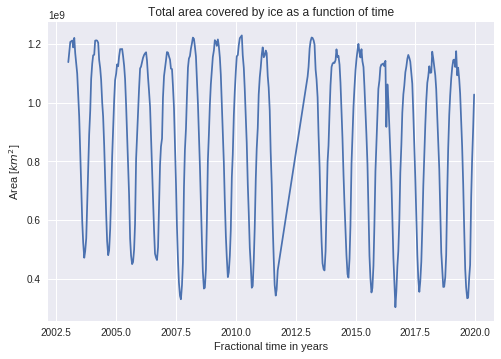

In [6]:
'''Plotting the total area covered by the ice as a function of time.'''

# Creating a random array to store data.
Total_ice = np.random.random(size=len(files)) 


for j,file in enumerate(files):
    # Loading file data
    loading = np.load(file)
    
    # Creating mask of pixels which have any value (positive values, not  nan values).
    mask = loading > 0
    
    '''
        Multiplying concentration values of each pixel to corrisponding area values
        to get the actual area covered by the ice.
    '''  
    loading = loading * ice_data_area 
    
    '''Calculating the total area covered by the ice for each file and storing it into an array.'''
    Total_ice[j] = np.nansum(loading[mask])

# Plotting graph of total area covered by the ice against time.
plt.style.use("seaborn")
plt.xlabel('Fractional time in years')
plt.ylabel('Area [$km^2$]')
plt.title('Total area covered by ice as a function of time')
plt.plot(times,Total_ice)
plt.show()

# Discussing
In the above plot we can see that, over the entire time perid, minimum value of ice has decreased very much.
In from 2002 to 2006 this decrease was not prominent te around year 2007 there was a rapid decrease. The it again started increasing but from year 2010 onward it again decreased.
Then next major decrease, which is the minimum value of this plot, happened in year 2016.
Over all miimum values are showing sort of zigzag pattern but on the whole, minimum values ae decreasing.

# Task 3 (Part 1)

298Smallest region covered with ice = 302536921.0330965 at Time = 2016.6666666666667


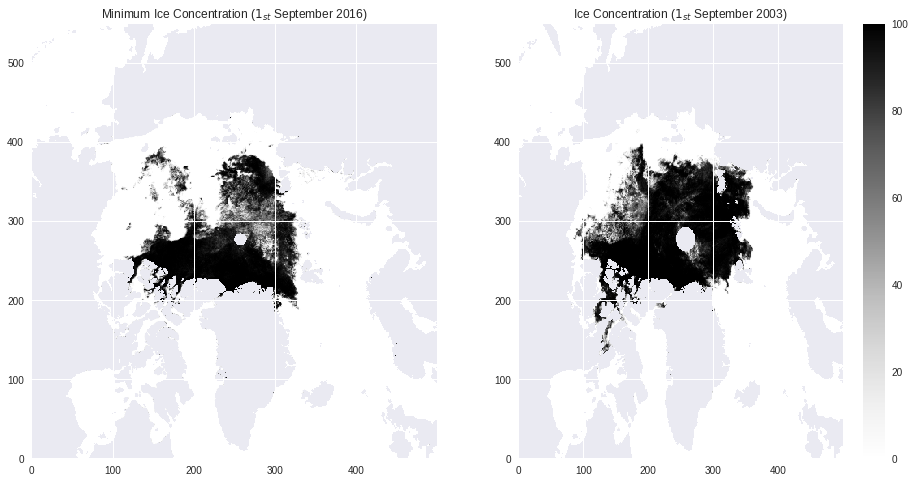

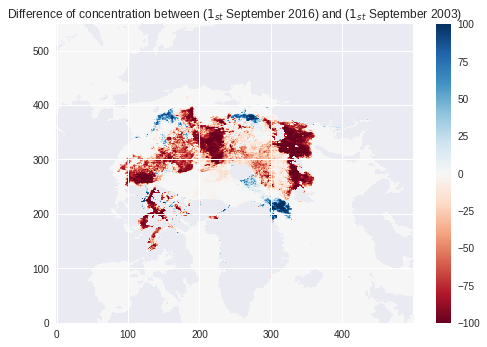

In [7]:
'''
Finding the date at which the area of the region covered by the ice is the smallest. 
And what is the value of the minimum area?
'''

# Applying np.argmin() to get the minimum value of area covered by the ice.
minimum_value_index = np.argmin(Total_ice)

# Printing the result
print(f'{minimum_value_index}Smallest region covered with ice = {Total_ice[minimum_value_index]} at Time = {times[minimum_value_index]}')

# Loading the file with minimum ice-concentrations.
read_1 = np.load(files[minimum_value_index]) 

# Getting index of same the month and day in 2003
index = np.where(times==(times[minimum_value_index]-13))


'''
    The type of variable "index" is tuple. So we first need to convert it into integer to use it as index.
    And as the size of this tuple is 1 so I took its first element and converted using int() which gaves us the required
    index.
'''
# Converting tuple into integer.
index = int(index[0])

# Loading the required file in 2003.
read_2 = np.load(files[index]) 



# Make a side-by-side plot showing the two ice-concentrations.
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Minimum Ice Concentration ($1_{st}$ September 2016)')
plt.imshow(read_1, aspect='auto', origin ='lower')

plt.subplot(1, 2, 2)
plt.title('Ice Concentration ($1_{st}$ September 2003)')
plt.imshow(read_2, aspect='auto', origin ='lower')
plt.colorbar()
plt.show()



'''
    Calculating the difference between the two maps.
'''

Difference = read_1 - read_2
                                                    

# Plotting the difference between two maps.

plt.imshow(Difference, origin ='lower',aspect='auto',cmap=plt.cm.RdBu)
plt.title('Difference of concentration between ($1_{st}$ September 2016) and ($1_{st}$ September 2003)')
plt.colorbar()
plt.show()

# Task 2 (Past 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater


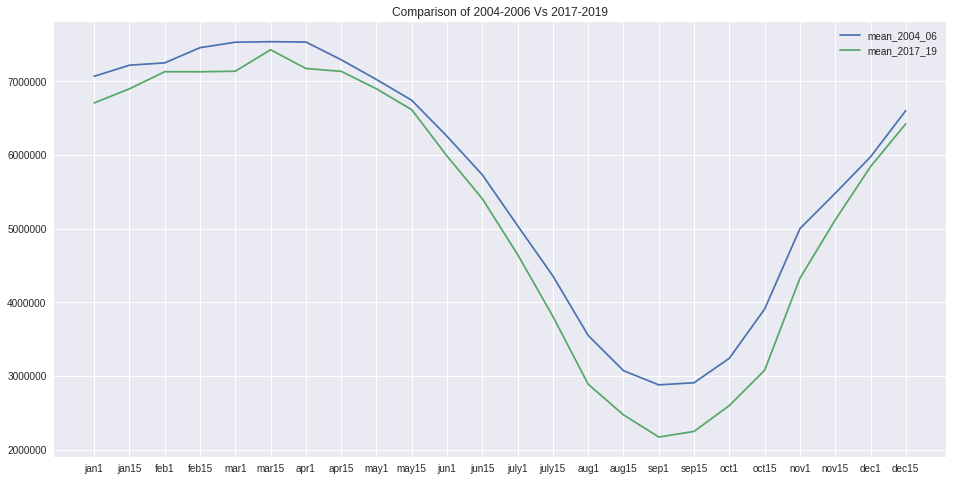

Difference between minimum values = 708634.0833333335


In [8]:
'''
        Plotting the mean ice concentrations of the years 2004-2006 over the months January to December and 
        comparing it to the mean over the years 2017-2019.
'''

# Getting the index values of 1st of Januaries of the following years.
new_index1 = np.where(times==2004.00)
new_index2 = np.where(times==2007.00)
new_index3 = np.where(times==2017.00)
new_index4 = np.where(times==2020.00)   # new_index4 is empty which means that our data is only upto december 2019.

# Converting index values from data type Tuple to integer.
new_index1, new_index2 = int(new_index1[0]), int(new_index2[0])
new_index3 = int(new_index3[0])

# Masking the values in "times" array for year 2004-2006 according to the given condition in question.
mask_times1 = times >= 2004
mask_times2 = times < 2007

# Combining masks to creat a single mask.
mask1 = mask_times1 & mask_times2

# Again masking the "times" for year 2017-2019
mask_times3 = times >= 2017
mask_times4 = times < 2020

# Combining masks again like before
mask2 = mask_times3 & mask_times4

# Creating a random array to store the data.
ice = np.random.random(size=len(files))


'''
    Now here I am calculating the total concentration of ice for each map to take mean
    of them over the required periods of time.
'''

for i,f in enumerate(files):
    file_data = np.load(f)
    ice[i] = np.sum(file_data[file_data>0])

    
'''
    Here I am getting the desired data corresponding to the required time slots 
    by applying the masks we got previously.
'''
    
    
ice_2004_06 = ice[mask1]
ice_2017_19 = ice[mask2]

# Reshaping our array to get the mean value over each day of the month.
ice_2004_06 = ice_2004_06.reshape(3,24)
ice_2017_19 = ice_2017_19.reshape(3,24)

# Calculating the mean over each day of the month.
mean_2004_06 = np.mean(ice_2004_06, axis=0)
mean_2017_19 = np.mean(ice_2017_19, axis=0)

# Preparing array for x-axis.
times_new=(['jan1','jan15','feb1','feb15','mar1','mar15','apr1','apr15','may1','may15','jun1','jun15','july1','july15','aug1','aug15','sep1','sep15','oct1','oct15','nov1','nov15','dec1','dec15'])


# Plotting both mean value arrays against "times_new" array.
plt.figure(figsize=(16,8))
plt.plot(times_new,mean_2004_06,label='mean_2004_06')
plt.title('Comparison of 2004-2006 Vs 2017-2019')
plt.plot(times_new,mean_2017_19,label='mean_2017_19')
plt.legend()
plt.show()

# Calculating the difference between minimum values of both curves.
print(f'Difference between minimum values = {mean_2004_06.min()- mean_2017_19.min()}')